NAME - SHASHINI SHANMUGAN
GITHUB LINK -

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("/content/telco cus.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['MultipleLines'] = LabelEncoder().fit_transform(data['MultipleLines'])
data['InternetService'] = LabelEncoder().fit_transform(data['InternetService'])
data['OnlineSecurity'] = LabelEncoder().fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = LabelEncoder().fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = LabelEncoder().fit_transform(data['DeviceProtection'])
data['TechSupport'] = LabelEncoder().fit_transform(data['TechSupport'])
data['StreamingTV'] = LabelEncoder().fit_transform(data['StreamingTV'])
data['StreamingMovies'] = LabelEncoder().fit_transform(data['StreamingMovies'])
data['Contract'] = LabelEncoder().fit_transform(data['Contract'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = LabelEncoder().fit_transform(data['PaymentMethod'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

In [17]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [18]:
df = data.drop(columns=['customerID'])

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


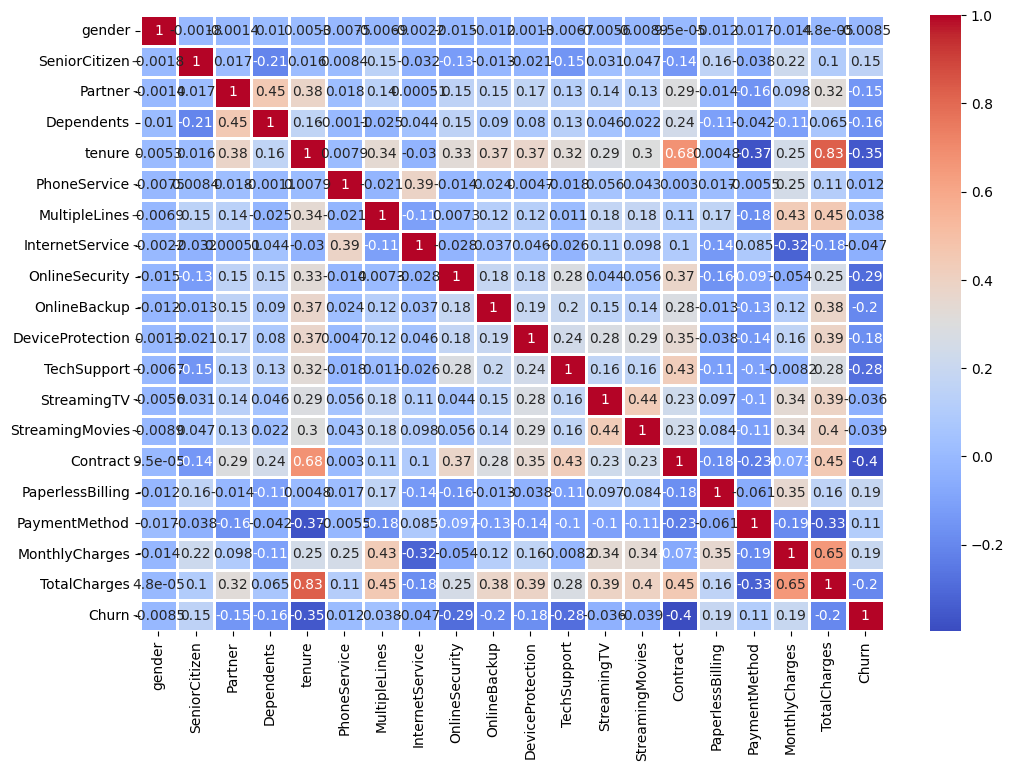

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Assuming 'df' is your DataFrame

# Replace spaces with NaN and then drop rows with NaN
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column].str.strip().replace('', np.nan), errors='coerce')

df = df.dropna()  # or you might choose df.fillna()

# Set figure size BEFORE calling sns.heatmap()
plt.figure(figsize=(12, 8))  # Adjust width and height

# Create heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

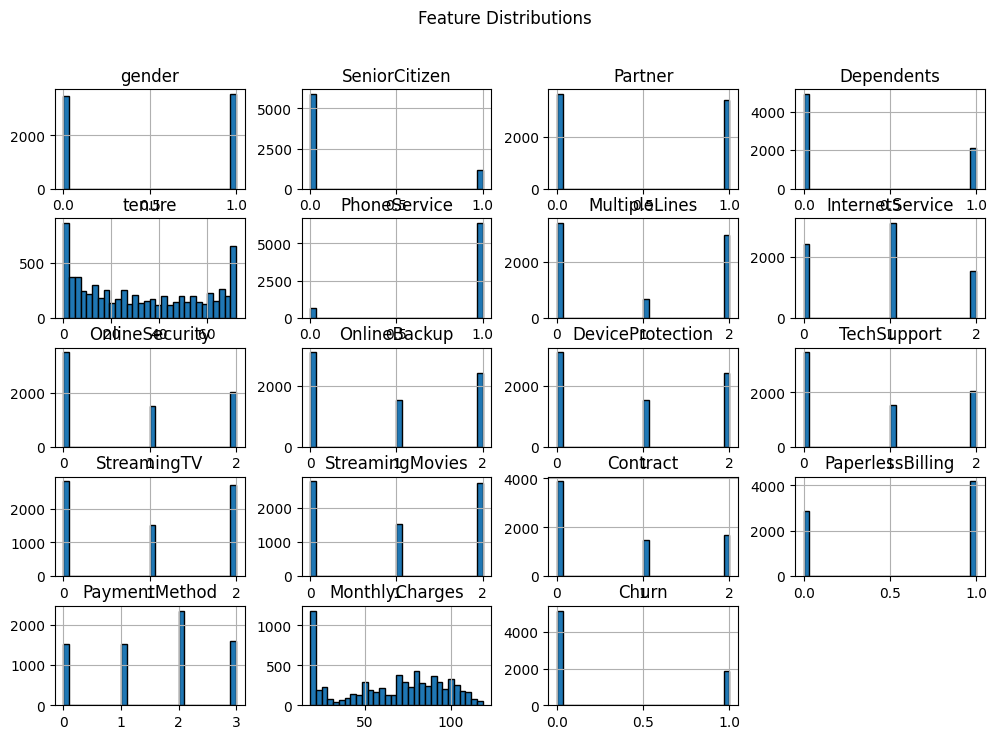

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

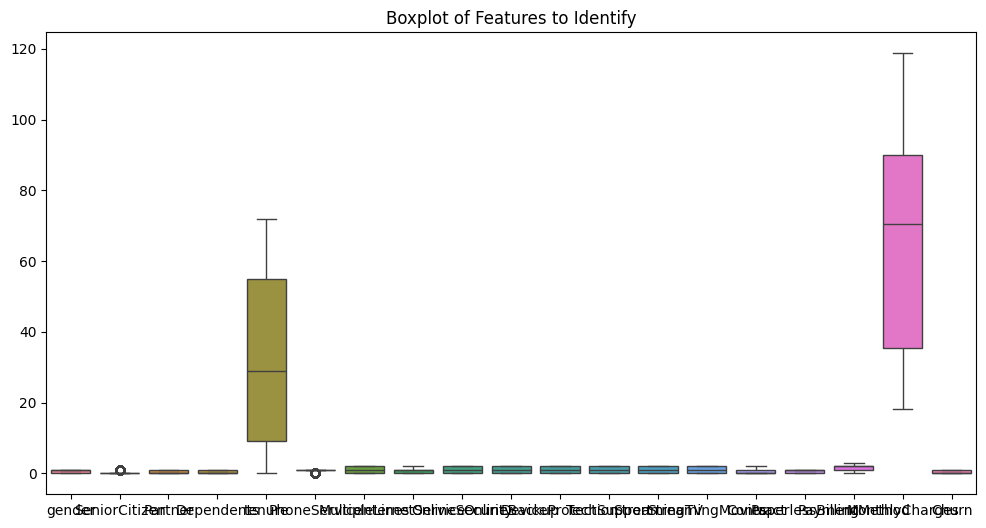

In [26]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data)
plt.title("Boxplot of Features to Identify")
plt.show()

In [27]:
X = data.iloc[:, [1, 4, 5, 7]].values
y = data.iloc[:, 8].values

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
y_pred1=model.predict(X)

In [38]:
data['Prediction']=y_pred1

In [39]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.5,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,1,1,3,84.80,1990.5,0,1
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,0,2,2,1,1,1,103.20,7362.9,0,1
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,1,3,74.40,306.6,1,1


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
cm = confusion_matrix(y_test, y_pred)

In [41]:
print(cm)

[[101 325  69]
 [ 95 475  40]
 [ 78 127  99]]


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47906316536550747
